In [2]:
pip install yfinance


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip show yfinance

Name: yfinance
Version: 0.2.50
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: c:\Users\Owner\OneDrive\Coding Projects\Project 1\.venv\Lib\site-packages
Requires: beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
data = yf.download('AAPL')
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2025-01-13,234.399994,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,233.279999,236.119995,232.470001,234.750000,39435300


In [8]:
log_returns = np.log(1+data['Adj Close'].pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
drift

Ticker
AAPL    0.0003
dtype: float64

In [9]:
stdev = log_returns.std()
days = 50
trials = 1000
Z = norm.ppf(np.random.rand(days, trials))
daily_returns = np.exp(np.array(drift) + np.array(stdev) * Z)

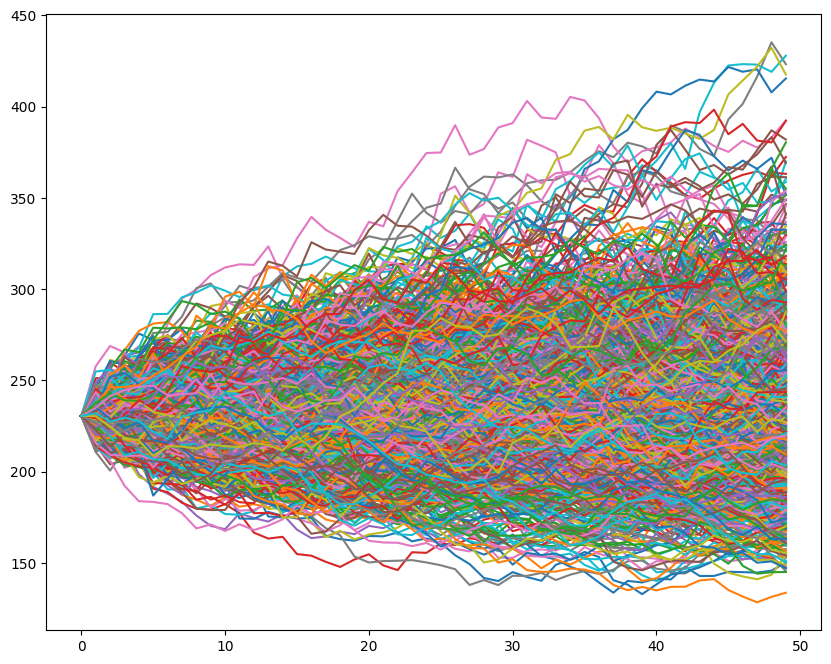

In [10]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data['Adj Close'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
plt.figure(figsize=[10,8])
plt.plot(price_paths)

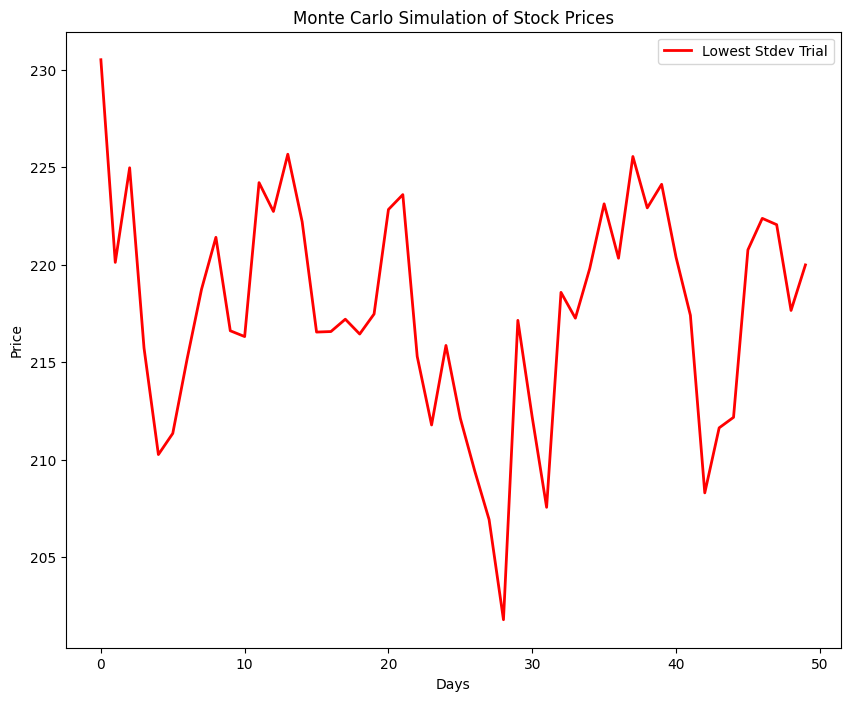

In [11]:
trial_stdevs = np.std(price_paths, axis=0 if price_paths.shape[1] == trials else 1)
min_stdev_index = np.argmin(trial_stdevs)
plt.figure(figsize=[10, 8])
for i in range(trials):
    if i == min_stdev_index:
        plt.plot(price_paths[:, i], color='red', linewidth=2, label='Lowest Stdev Trial')
plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()